### Project: Predicting Credit Card Approvals

##### For this AI project, I have use various skills, such as handling missing values, processing categorical features, scaling features, dealing with unbalanced data, and applying automatic hyperparameter optimization through GridCV.

#### Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import mplcyberpunk

import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv("D:\Project Resource\Predicting Credit Card Approvals\loan_data.csv")

In [112]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [113]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [115]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [116]:
# Changing "." to "_" in name of the columns

df.columns = [c.replace(".","_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/varabiles: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/varabiles: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<Axes: xlabel='log_annual_inc', ylabel='Count'>

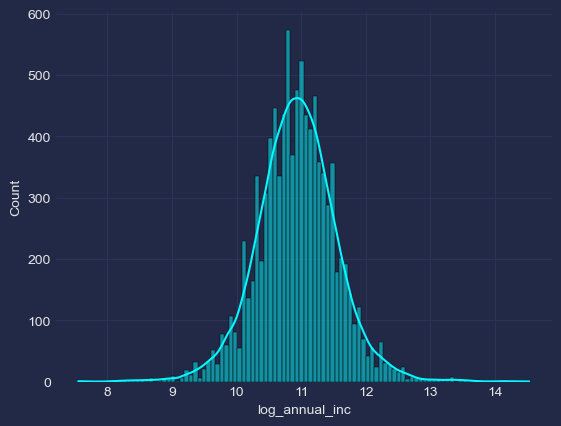

In [118]:
plt.style.use('cyberpunk')

sns.histplot(data=df, x='log_annual_inc', kde=True)

In [110]:
df.head()

,precision,recall,f1-score,support
0,0.854780,0.879983,0.867199,2408.000000
1,0.268354,0.227468,0.246225,466.000000
accuracy,0.774182,0.774182,0.774182,0.774182
macro avg,0.561567,0.553726,0.556712,2874.000000
weighted avg,0.759695,0.774182,0.766512,2874.000000


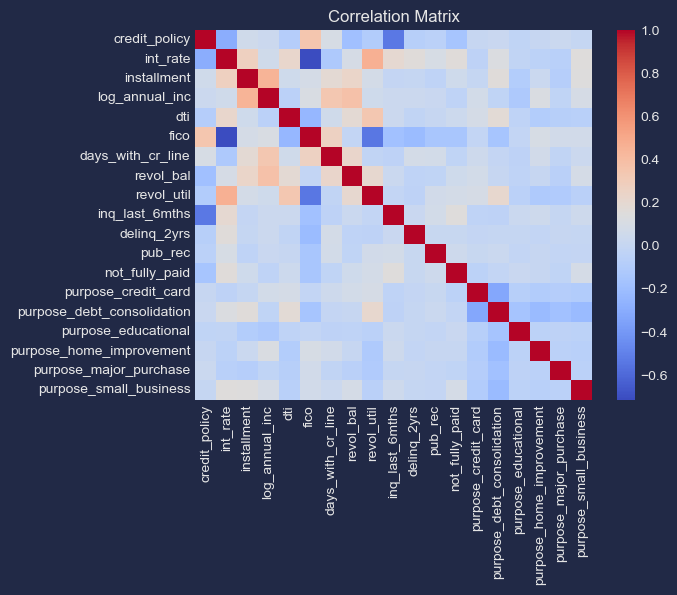

In [22]:
corr_matrix = df.corr()

plt.Figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Encode Categorical varaibles

df = pd.get_dummies(df,['purpose'], drop_first=True)

In [17]:
df.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [23]:
df.columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

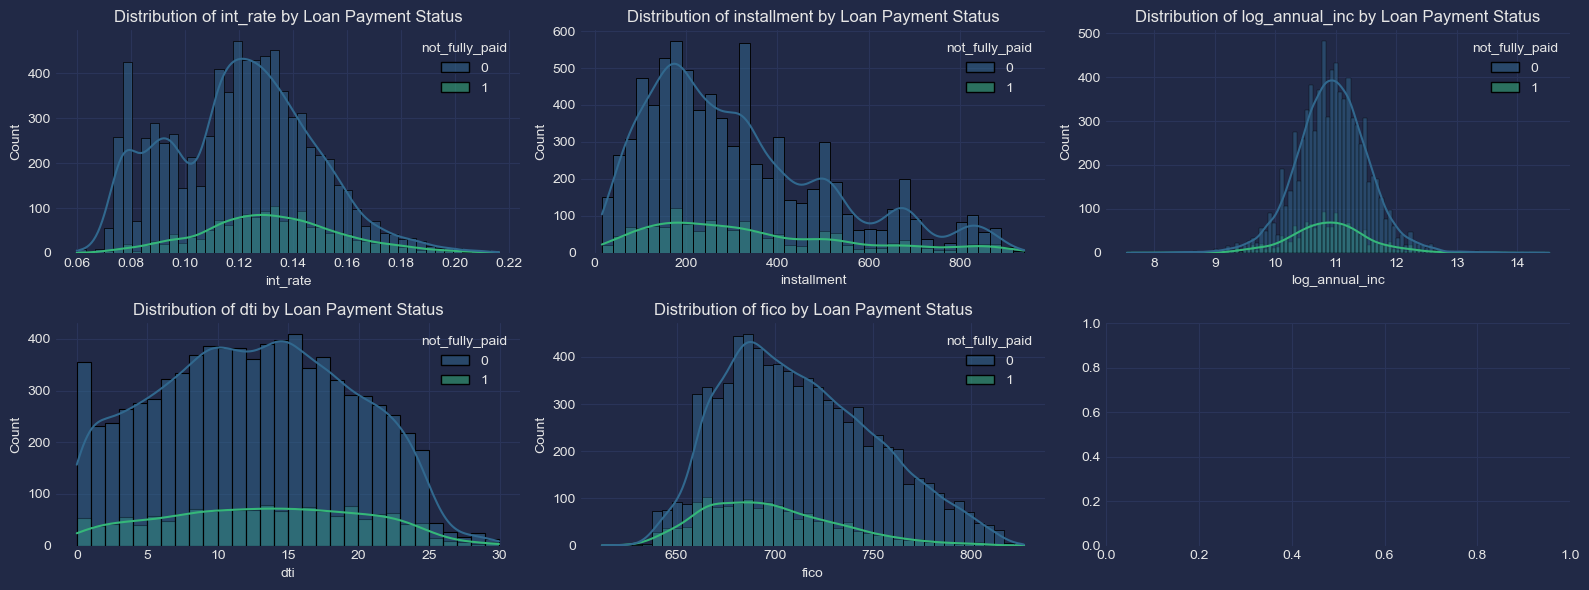

In [34]:
numeric_col = ['int_rate', 'installment', 'log_annual_inc', 'dti','fico']


fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(data=df, x=col, hue='not_fully_paid', kde=True, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Loan Payment Status")

plt.tight_layout()
plt.show()

In [37]:
# Feature Scaling

numeric_features = ['int_rate', 'installment', 'log_annual_inc', 'dti','fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
                   'inq_last_6mths', 'delinq_2yrs', 'pub_rec']

In [39]:
scaler  = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [44]:
df[numeric_features].round(2)

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,-0.14,2.46,0.68,1.00,0.69,0.43,0.35,0.18,-0.72,-0.30,-0.24
1,-0.58,-0.44,0.24,0.24,-0.10,-0.72,0.50,1.03,-0.72,-0.30,-0.24
2,0.49,0.23,-0.91,-0.14,-0.76,0.06,-0.40,-0.73,-0.26,-0.30,-0.24
3,-0.81,-0.76,0.68,-0.65,0.03,-0.75,0.50,0.91,-0.26,-0.30,-0.24
4,0.74,-1.04,0.60,0.34,-1.15,-0.20,-0.36,-0.25,-0.72,1.53,-0.24
...,...,...,...,...,...,...,...,...,...,...,...
9573,0.87,0.12,2.03,-0.32,-1.02,2.37,5.88,1.22,0.19,-0.30,-0.24
9574,0.10,-0.30,0.34,-1.80,0.29,-0.07,-0.50,-1.58,1.56,-0.30,-0.24
9575,-0.58,-1.07,-0.55,0.07,-0.63,-0.44,-0.20,1.24,2.92,-0.30,-0.24
9576,1.39,0.16,-0.18,0.95,-0.50,-1.11,-0.50,-1.50,1.56,-0.30,-0.24


In [45]:
# Spliting Data into train and test set

X = df.drop('not_fully_paid', axis=1)
y = df['not_fully_paid']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train,y_train)

xgb = XGBClassifier(scale_pos_weight= 5.25, n_jobs=-1, verbose=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
# Classification Report

models = [lr,rf,svc,xgb]
model_names = ['Logistic Regression','Random Forest', 'SVC', 'XGBoost']

for model, name in zip(models, model_names):
    y_predict = model.predict(X_test)
    print(f"\n Classification report of {name}:")
    cp = classification_report(y_test, y_predict)
    print(cp)


 Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      2408
           1       0.26      0.63      0.37       466

    accuracy                           0.65      2874
   macro avg       0.58      0.64      0.56      2874
weighted avg       0.80      0.65      0.70      2874


 Classification report of Random Forest:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.50      0.01      0.01       466

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874


 Classification report of SVC:
              precision    recall  f1-score   support

           0       0.89      0.69      0.77      2408
           1       0.25      0.54      0.34       466

    accuracy                           0.66      2874
   mac

Confusion matrix Logistic Regression:  
 [[1577  831]
 [ 173  293]]


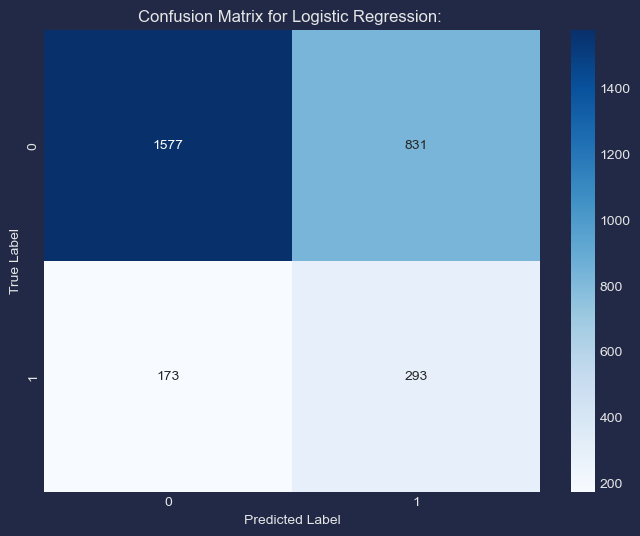

Confusion matrix Random Forest:  
 [[2405    3]
 [ 463    3]]


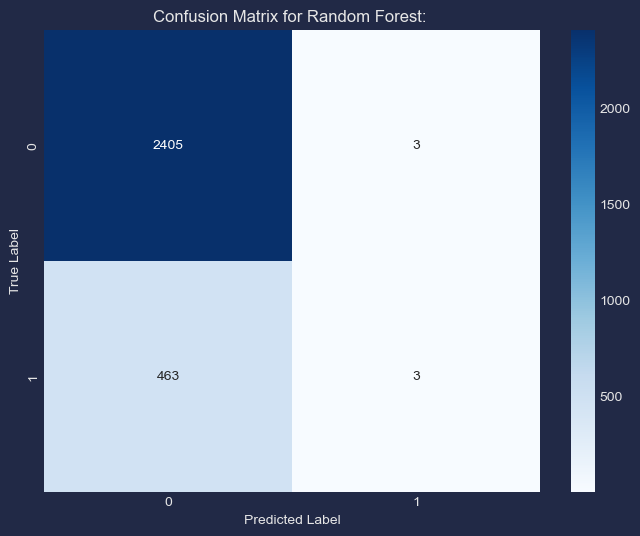

Confusion matrix SVC:  
 [[1654  754]
 [ 214  252]]


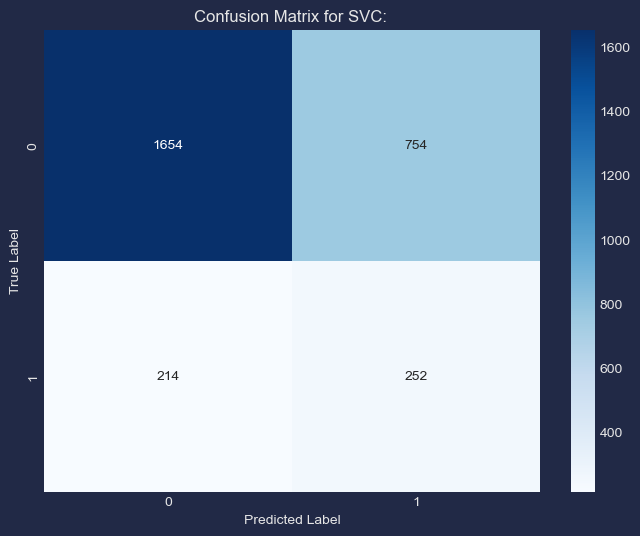

Confusion matrix XGBoost:  
 [[2119  289]
 [ 360  106]]


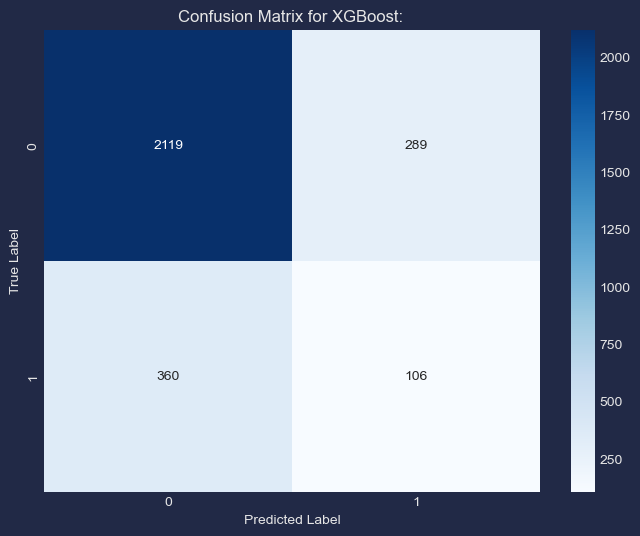

In [82]:
# Confusion Matrix 

for model, name in zip(models, model_names):
    cf_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, cf_pred)


    print(f"Confusion matrix {name}:  \n {cm}"  )
    plt.figure(figsize=(8,6))
    sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}: ')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


ROC AUC Score for Logistic Regression: 0.6960

ROC AUC Score for Random Forest: 0.6452

ROC AUC Score for SVC: 0.6692

ROC AUC Score for XGBoost: 0.6049


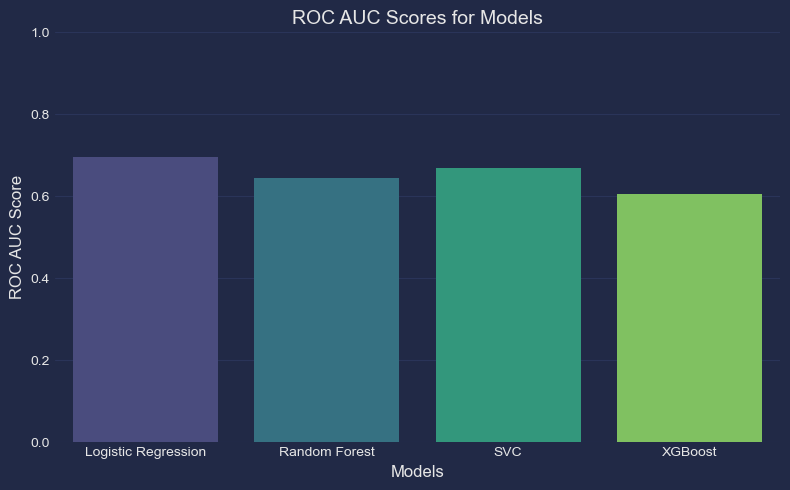

In [103]:
# ROC AUC score
from sklearn.metrics import roc_auc_score

auc_scores = []

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(roc)
    print(f"\nROC AUC Score for {name}: {roc:.4f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=auc_scores, palette="viridis")


plt.ylabel("ROC AUC Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.title("ROC AUC Scores for Models", fontsize=14)
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

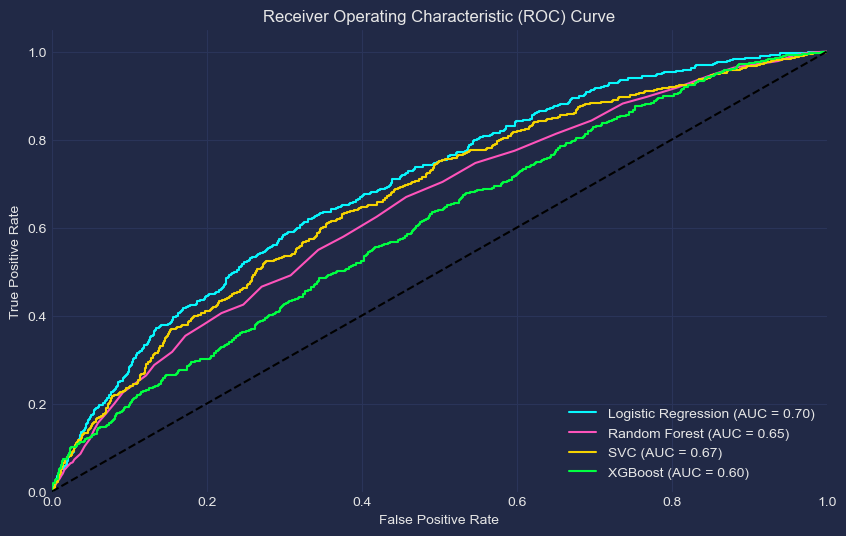

In [85]:
# Ploting ROC curve for all models 

plt.figure(figsize=(10,6))

for model, name in zip(models, model_names):
    curve_proba = model.predict_proba(X_test)[:,1]
    fpr,tpr, _ = roc_curve(y_test, curve_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, curve_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [47]:
# To manage the imbalance of the dataset we are using SMOTE.

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  File "s:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "s:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "s:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "s:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Hyperparameter Tuning Logistic regression
Best parameters for Logistic regression: {'C': 0.1, 'solver': 'liblinear'}
Best ROC AUC Score for Logistic regression: 0.7098041041109641

Hyperparameter Tuning Random Forest
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score for Random Forest: 0.9687929932386552

Hyperparameter Tuning SVC
Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best ROC AUC Score for SVC: 0.8883100364591883

Hyperparameter Tuning XGBoost
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC Score for XGBoost: 0.9530348838359185

The best model based on ROC AUC Score is: Random Forest with a score of 0.9688
Classificartion Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2408
           1       0.30      0.1

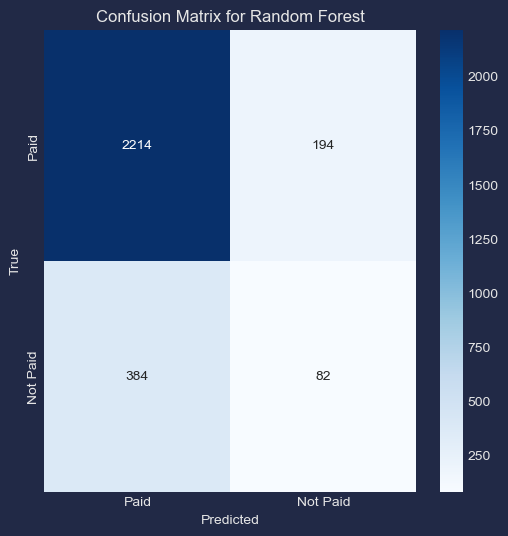

In [134]:
from sklearn.model_selection import GridSearchCV

algo_models = {
    'Logistic regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

param_grids = {
    'Logistic regression': {'C': [0.01,0.1,1,10,100],
                            'solver': ['liblinear','lbfgs']},
     'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }
}

best_model_name = ''
best_model_auc = 0
best_model = None

for name, model in algo_models.items():
    print(f'Hyperparameter Tuning {name}')
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1,)
    grid_search.fit(X_train_resampled,y_train_resampled)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC Score for {name}: {grid_search.best_score_}\n")

    if grid_search.best_score_ > best_model_auc:
        best_model_auc = grid_search.best_score_
        best_model_name = name
        best_model = grid_search.best_estimator_

print(f"The best model based on ROC AUC Score is: {best_model_name} with a score of {best_model_auc:.4f}")

y_prediction = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Classificartion Report")
print(classification_report(y_test, y_prediction))

roc_score_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_score_auc:.4f}")

print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_prediction)
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Paid', 'Not Paid'], yticklabels=['Paid', 'Not Paid'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

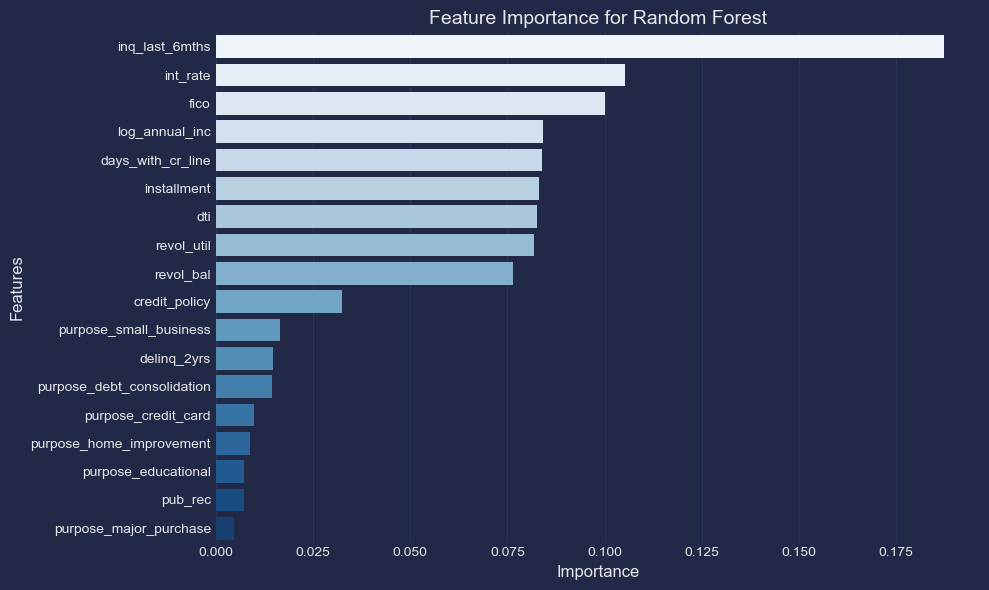

In [140]:
feature_importance = best_model.feature_importances_

if isinstance(X_train, pd.DataFrame):
    features = X_train.columns 
else:
    features = ['feature_{}'.format(i) for i in range(X_train.shape[1])] 

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')
plt.title("Feature Importance for Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [141]:
# Deploying the Model

import joblib

joblib.dump(best_model, "Credit_approval_model.pki")

['Credit_approval_model.pki']